# Introduction

- Pauliceia's project (historical data)

- Baltimore data

# Baltimore Victim Based Crime Data

## Installing packages:

Install geopandas:

$ sudo pip3 install geopandas

Install the bokeh:

$ sudo pip3 install bokeh

$ bokeh sampledata

## Imports

Do the necessaries imports:

In [1]:
%matplotlib inline

# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# use the style of ggplot (R) for graphics (it is more beautiful)
from matplotlib.style import use
use('ggplot')

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
from datetime import datetime

In [4]:
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

In [5]:
from os import makedirs
from os.path import exists, isfile, getsize

# import urllib.request as urllib       # Python 2.7
from urllib.request import urlretrieve  # Python 3

If the temporaries directories don't exist, so create them:

In [6]:
path_of_folders = ["files/data/", "files/shp/"]

for path_of_folder in path_of_folders:
    if not exists(path_of_folder):
        makedirs(path_of_folder)

# Download the CSV data and ShapeFile

Download the CSV data from https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

In [7]:
based_crime_data_data = "files/data/Based_Crime_Data.csv"

In [8]:
based_crime_data_csv = "https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD"

# download the file
# urlretrieve(based_crime_data_csv, based_crime_data_csv)

if isfile(based_crime_data_data):
    tam = getsize(based_crime_data_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  40538138  bytes.


Download the ShapeFile of Baltimore from https://data.baltimorecity.gov/Geographic/Land-use-Shape/feax-3ycj

In [9]:
shape_file_data = "files/shp/landuse.zip"

In [10]:
shape_file_zip = "https://data.baltimorecity.gov/api/views/feax-3ycj/files/hMHrtD_9UtnfKw47cqs_2RYH9ZXET7TlpW4V4_4A_IE?filename=Landuse.zip"

# download the file
# urlretrieve(shape_file_zip, shape_file_data)

if isfile(shape_file_data):
    tam = getsize(shape_file_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  3709817  bytes.


The projection of the points in dataframe is WGS84 (EPSG:4326) and the shapefile of Baltimore I have no idea... So I used the QGIS to reproject the shapefile to WGS84 (EPSG:4326)

# Read the ShapeFile and CSV data

Load the Shapefile using geopandas to use it in the future:

In [11]:
shape_file_path = "files/shp/landuse_4326/landuse_4326.shp"  

shape_file_data_gp = gpd.read_file(shape_file_path)

# avoid missing (NaN) values
# shape_file_data_gp = shape_file_data_gp[shape_file_data_gp.geometry.notnull()]

shape_file_data_gp.crs

{'init': 'epsg:4326'}

In [12]:
shape_file_data_gp.head()

,LU_2008,Shape_Leng,Shape_Area,geometry
0,Low Density Residential,814.879889,39162.588802,POLYGON ((-76.63202678843903 39.32761753657134...
1,Low Density Residential,1328.399489,108192.459482,"POLYGON ((-76.6002548745586 39.32244777330502,..."
2,Low Density Residential,1418.039915,75312.735463,POLYGON ((-76.59451222737226 39.32068341521047...
3,Low Density Residential,2788.871558,455559.444337,POLYGON ((-76.65339222090071 39.33261332482496...
4,Low Density Residential,898.177248,50353.730253,POLYGON ((-76.53693066711821 39.36853839332729...


# Cleaning the data

Read the CSV keeping the same header:

In [13]:
df_crimes = pd.read_csv(based_crime_data_data)

Renaming the "Location.1" column to "Lat_Long" from df_crimes:

In [14]:
df_crimes = df_crimes.rename(columns={"Location 1": "Lat_Long"})

All cells with NaN values, I change them to a string called "UNDEFINED" (to avoid problems...):

In [15]:
df_crimes["Weapon"] = df_crimes["Weapon"].fillna("UNDEFINED")

df_crimes["Description"] = df_crimes["Description"].fillna("UNDEFINED")

df_crimes["Weapon"] = df_crimes["Weapon"].fillna("UNDEFINED")

df_crimes["Neighborhood"] = df_crimes["Neighborhood"].fillna("UNDEFINED")

df_crimes["Premise"] = df_crimes["Premise"].fillna("UNDEFINED")

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


Remove the "Total Incidents", because it is the same value (1) for all rows:

In [16]:
df_crimes = df_crimes.drop('Total Incidents', 1)

## Transform types values in categories (factors)

Transform the types to category (factor) and put in dataframe with a new name:

In [17]:
df_crimes["DescriptionFactor"] = df_crimes["Description"].astype('category')

df_crimes["WeaponFactor"] = df_crimes["Weapon"].astype('category')

df_crimes["NeighborhoodFactor"] = df_crimes["Neighborhood"].astype('category')

df_crimes["PremiseFactor"] = df_crimes["Premise"].astype('category')

df_crimes["InsideOutsideFactor"] = df_crimes["Inside/Outside"].astype('category')

df_crimes["DistrictFactor"] = df_crimes["District"].astype('category')

# slicing by indexes
# df_crimes[df_crimes.columns[6:]].head() 

# slicing by columns
df_crimes[["Description", "DescriptionFactor", "Weapon", "WeaponFactor",
    "Neighborhood", "NeighborhoodFactor", "Premise", "PremiseFactor",
    "Inside/Outside", "InsideOutsideFactor", "District", "DistrictFactor"]].head()

,Description,DescriptionFactor,Weapon,WeaponFactor,Neighborhood,NeighborhoodFactor,Premise,PremiseFactor,Inside/Outside,InsideOutsideFactor,District,DistrictFactor
0,LARCENY FROM AUTO,LARCENY FROM AUTO,UNDEFINED,UNDEFINED,Burleith-Leighton,Burleith-Leighton,STREET,STREET,O,O,NORTHWESTERN,NORTHWESTERN
1,COMMON ASSAULT,COMMON ASSAULT,HANDS,HANDS,Easterwood,Easterwood,STREET,STREET,O,O,WESTERN,WESTERN
2,HOMICIDE,HOMICIDE,FIREARM,FIREARM,Northwest Community Actio,Northwest Community Actio,Street,Street,Outside,Outside,SOUTHWESTERN,SOUTHWESTERN
3,COMMON ASSAULT,COMMON ASSAULT,HANDS,HANDS,Upton,Upton,APT/CONDO,APT/CONDO,I,I,CENTRAL,CENTRAL
4,LARCENY,LARCENY,UNDEFINED,UNDEFINED,Allendale,Allendale,GROCERY/CO,GROCERY/CO,I,I,SOUTHWESTERN,SOUTHWESTERN


Number of rows in my dataframe:

In [18]:
len(df_crimes.index)

272252

How seems my factors? Let me see...

In [19]:
df_crimes["DescriptionFactor"].head()

0    LARCENY FROM AUTO
1       COMMON ASSAULT
2             HOMICIDE
3       COMMON ASSAULT
4              LARCENY
Name: DescriptionFactor, dtype: category
Categories (15, object): [AGG. ASSAULT, ARSON, ASSAULT BY THREAT, AUTO THEFT, ..., ROBBERY - COMMERCIAL, ROBBERY - RESIDENCE, ROBBERY - STREET, SHOOTING]

In [20]:
df_crimes["WeaponFactor"].head()

0    UNDEFINED
1        HANDS
2      FIREARM
3        HANDS
4    UNDEFINED
Name: WeaponFactor, dtype: category
Categories (5, object): [FIREARM, HANDS, KNIFE, OTHER, UNDEFINED]

In [24]:
df_crimes["DistrictFactor"].head()

0    NORTHWESTERN
1         WESTERN
2    SOUTHWESTERN
3         CENTRAL
4    SOUTHWESTERN
Name: DistrictFactor, dtype: category
Categories (9, object): [CENTRAL, EASTERN, NORTHEASTERN, NORTHERN, ..., SOUTHEASTERN, SOUTHERN, SOUTHWESTERN, WESTERN]

## Convert the date in string to datetime

Create a new column called CrimeDateTime with the date in datetime:

In [26]:
df_crimes['CrimeDateTime'] = pd.to_datetime(df_crimes['CrimeDate'])

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor,CrimeDateTime
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,O,NORTHWESTERN,2017-08-05
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,O,WESTERN,2017-08-05
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Outside,SOUTHWESTERN,2017-08-05
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,I,CENTRAL,2017-08-05
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,I,SOUTHWESTERN,2017-08-05


The column CrimeDateTime is in the end, so... we will reorder the columns:

In [27]:
# get the list of columns
cols = df_crimes.columns.tolist()
# put the last column as first column
cols = cols[-1:] + cols[:-1]
# reorder the columns
df_crimes = df_crimes[cols]

df_crimes.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,O,NORTHWESTERN
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,O,WESTERN
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Outside,SOUTHWESTERN
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,I,CENTRAL
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,I,SOUTHWESTERN


## Looking the information inside the actual dataframe

Describe the dataframe:

In [28]:
df_crimes.describe()

,Post,Longitude,Latitude
count,272025.000000,270081.000000,270081.000000
mean,506.183288,-76.617435,39.307419
std,260.701478,0.042297,0.029545
min,2.000000,-76.711620,39.200410
25%,243.000000,-76.648430,39.288350
50%,511.000000,-76.613970,39.303660
75%,731.000000,-76.587450,39.327810
max,945.000000,-76.528500,39.372930


In [29]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272252 entries, 0 to 272251
Data columns (total 20 columns):
CrimeDateTime          272252 non-null datetime64[ns]
CrimeDate              272252 non-null object
CrimeTime              272252 non-null object
CrimeCode              272252 non-null object
Location               270078 non-null object
Description            272252 non-null object
Inside/Outside         262667 non-null object
Weapon                 272252 non-null object
Post                   272025 non-null float64
District               272170 non-null object
Neighborhood           272252 non-null object
Longitude              270081 non-null float64
Latitude               270081 non-null float64
Lat_Long               270081 non-null object
Premise                272252 non-null object
DescriptionFactor      272252 non-null category
WeaponFactor           272252 non-null category
NeighborhoodFactor     272252 non-null category
InsideOutsideFactor    262667 non-null categ

In [30]:
df_crimes.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,O,NORTHWESTERN
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,O,WESTERN
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Outside,SOUTHWESTERN
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,I,CENTRAL
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,I,SOUTHWESTERN


# Copy the dataframe (backup)

Do a copy of dataframe:

In [31]:
df_crimes_cp = df_crimes.copy()

# Create a function to plot the shapefile with the points of crimes

In [32]:
def plot_shapefile_and_points_gp(gp_shape_file, df_crimes, title_of_plot):
    gp_shape_file.plot(markersize=6, color="white", edgecolor="black", figsize=(15,10))

    plt.title(title_of_plot)

    # Get the x (Longitude) and y (Latitude) values
    # Put the points of crimes on plot
    x = np.array(list(df_crimes["Longitude"]))
    y = np.array(list(df_crimes["Latitude"]))
    plt.plot(x, y, 'ro', markeredgecolor='white', markeredgewidth=0.5)  # r - red , o - circle , w - white

# Example 1: All crimes in Baltimore in one day

Get all crimes on the following query:

In [33]:
date = datetime(2016, 12, 25)

df_crimes_query = df_crimes_cp[df_crimes_cp.CrimeDateTime == date]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 30381 to 30492
Data columns (total 20 columns):
CrimeDateTime          112 non-null datetime64[ns]
CrimeDate              112 non-null object
CrimeTime              112 non-null object
CrimeCode              112 non-null object
Location               111 non-null object
Description            112 non-null object
Inside/Outside         112 non-null object
Weapon                 112 non-null object
Post                   112 non-null float64
District               112 non-null object
Neighborhood           112 non-null object
Longitude              111 non-null float64
Latitude               111 non-null float64
Lat_Long               111 non-null object
Premise                112 non-null object
DescriptionFactor      112 non-null category
WeaponFactor           112 non-null category
NeighborhoodFactor     112 non-null category
InsideOutsideFactor    112 non-null category
DistrictFactor         112 non-null category
dtypes: 

In [34]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
30381,2016-12-25,12/25/2016,23:53:00,7A,2400 ORLEANS ST,AUTO THEFT,O,UNDEFINED,221.0,SOUTHEASTERN,McElderry Park,-76.58301,39.29562,"(39.2956200000, -76.5830100000)",STREET,AUTO THEFT,UNDEFINED,McElderry Park,O,SOUTHEASTERN
30382,2016-12-25,12/25/2016,23:15:00,4D,1200 SARGEANT ST,AGG. ASSAULT,I,HANDS,932.0,SOUTHERN,Washington Village/Pigtow,-76.63494,39.28179,"(39.2817900000, -76.6349400000)",ROW/TOWNHO,AGG. ASSAULT,HANDS,Washington Village/Pigtow,I,SOUTHERN
30383,2016-12-25,12/25/2016,22:42:00,4E,1000 SAINT PAUL ST,COMMON ASSAULT,I,HANDS,141.0,CENTRAL,Mid-Town Belvedere,-76.61436,39.30171,"(39.3017100000, -76.6143600000)",APT/CONDO,COMMON ASSAULT,HANDS,Mid-Town Belvedere,I,CENTRAL
30384,2016-12-25,12/25/2016,22:32:00,3AF,2400 GREENMOUNT AVE,ROBBERY - STREET,O,FIREARM,341.0,EASTERN,Barclay,-76.60950,39.31673,"(39.3167300000, -76.6095000000)",STREET,ROBBERY - STREET,FIREARM,Barclay,O,EASTERN
30385,2016-12-25,12/25/2016,22:00:00,3CF,3100 MCELDERRY ST,ROBBERY - COMMERCIAL,I,FIREARM,224.0,SOUTHEASTERN,Ellwood Park/Monument,-76.57275,39.29809,"(39.2980900000, -76.5727500000)",CONVENIENC,ROBBERY - COMMERCIAL,FIREARM,Ellwood Park/Monument,I,SOUTHEASTERN


## Plot the data

Plot the shapefile with the point of crimes:

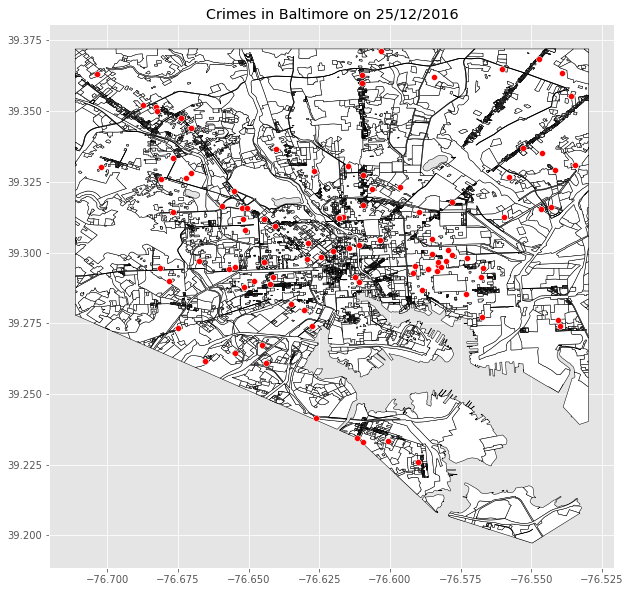

In [35]:
title_of_plot = 'Crimes in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

# Example 2: All assaults in Baltimore in one day

Get all crimes on the following query:

In [36]:
date = datetime(2017, 3, 25)
type_of_crime = "assault"

type_of_crime_regex = "(?i)" + type_of_crime  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime == date) & 
                               (df_crimes_cp['Description'].str.contains(type_of_crime_regex, na=False))]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 18622 to 18744
Data columns (total 20 columns):
CrimeDateTime          48 non-null datetime64[ns]
CrimeDate              48 non-null object
CrimeTime              48 non-null object
CrimeCode              48 non-null object
Location               48 non-null object
Description            48 non-null object
Inside/Outside         35 non-null object
Weapon                 48 non-null object
Post                   48 non-null float64
District               48 non-null object
Neighborhood           48 non-null object
Longitude              48 non-null float64
Latitude               48 non-null float64
Lat_Long               48 non-null object
Premise                48 non-null object
DescriptionFactor      48 non-null category
WeaponFactor           48 non-null category
NeighborhoodFactor     48 non-null category
InsideOutsideFactor    35 non-null category
DistrictFactor         48 non-null category
dtypes: category(5), datetime

In [37]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
18622,2017-03-25,03/25/2017,23:30:00,4E,2400 BARCLAY ST,COMMON ASSAULT,I,HANDS,341.0,EASTERN,Barclay,-76.61133,39.31689,"(39.3168900000, -76.6113300000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Barclay,I,EASTERN
18626,2017-03-25,03/25/2017,22:17:00,4E,3400 JUNEWAY,COMMON ASSAULT,I,HANDS,432.0,NORTHEASTERN,Belair-Edison,-76.56817,39.31812,"(39.3181200000, -76.5681700000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Belair-Edison,I,NORTHEASTERN
18629,2017-03-25,03/25/2017,21:30:00,4E,3200 RAVENWOOD AVE,COMMON ASSAULT,I,HANDS,434.0,NORTHEASTERN,Four By Four,-76.57808,39.31533,"(39.3153300000, -76.5780800000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Four By Four,I,NORTHEASTERN
18633,2017-03-25,03/25/2017,21:30:00,4C,REGESTER ST & E PRATT ST,AGG. ASSAULT,O,OTHER,212.0,SOUTHEASTERN,Upper Fells Point,-76.59248,39.28929,"(39.2892900000, -76.5924800000)",STREET,AGG. ASSAULT,OTHER,Upper Fells Point,O,SOUTHEASTERN
18637,2017-03-25,03/25/2017,21:00:00,4E,900 SAINT PAUL ST,COMMON ASSAULT,O,HANDS,142.0,CENTRAL,Mount Vernon,-76.61424,39.29985,"(39.2998500000, -76.6142400000)",STREET,COMMON ASSAULT,HANDS,Mount Vernon,O,CENTRAL


## Plot the data

Plot the shapefile with the point of crimes:

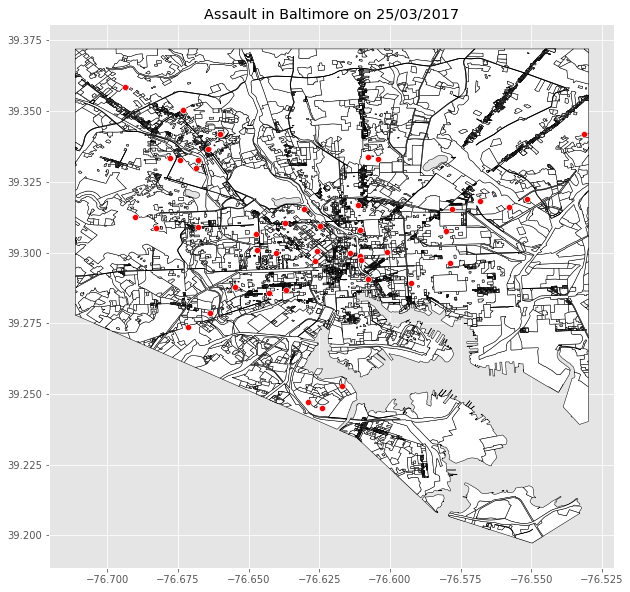

In [38]:
title_of_plot = type_of_crime.capitalize() + ' in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

# Example 3: All crimes in Saint Paul in Baltimore on a range of date

Get all crimes on the following query:

In [39]:
date_start = datetime(2017, 5, 13)
date_end = datetime(2017, 8, 15)

location = "SAINT PAUL"
location_regex = "(?i)" + location  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[
                                (df_crimes_cp.CrimeDateTime >= date_start) & 
                                (df_crimes_cp.CrimeDateTime <= date_end) &
                                (df_crimes_cp['Location'].str.contains(location_regex, na=False))
                               ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 150 to 11635
Data columns (total 20 columns):
CrimeDateTime          62 non-null datetime64[ns]
CrimeDate              62 non-null object
CrimeTime              62 non-null object
CrimeCode              62 non-null object
Location               62 non-null object
Description            62 non-null object
Inside/Outside         52 non-null object
Weapon                 62 non-null object
Post                   62 non-null float64
District               62 non-null object
Neighborhood           62 non-null object
Longitude              62 non-null float64
Latitude               62 non-null float64
Lat_Long               62 non-null object
Premise                62 non-null object
DescriptionFactor      62 non-null category
WeaponFactor           62 non-null category
NeighborhoodFactor     62 non-null category
InsideOutsideFactor    52 non-null category
DistrictFactor         62 non-null category
dtypes: category(5), datetime64

In [40]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
150,2017-08-04,08/04/2017,11:29:00,6F,3500 SAINT PAUL ST,LARCENY,O,UNDEFINED,512.0,NORTHERN,Charles Village,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",STREET,LARCENY,UNDEFINED,Charles Village,O,NORTHERN
197,2017-08-03,08/03/2017,22:30:00,4A,300 SAINT PAUL ST,AGG. ASSAULT,NaN,FIREARM,111.0,CENTRAL,Downtown,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",UNDEFINED,AGG. ASSAULT,FIREARM,Downtown,NaN,CENTRAL
234,2017-08-03,08/03/2017,17:44:00,6G,3500 SAINT PAUL ST,LARCENY,NaN,UNDEFINED,512.0,NORTHERN,Charles Village,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",UNDEFINED,LARCENY,UNDEFINED,Charles Village,NaN,NORTHERN
386,2017-08-02,08/02/2017,15:00:00,3AK,300 SAINT PAUL ST,ROBBERY - STREET,O,KNIFE,111.0,CENTRAL,Downtown,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",STREET,ROBBERY - STREET,KNIFE,Downtown,O,CENTRAL
506,2017-08-01,08/01/2017,16:20:00,6D,3300 SAINT PAUL ST,LARCENY FROM AUTO,O,UNDEFINED,512.0,NORTHERN,Charles Village,-76.61612,39.32822,"(39.3282200000, -76.6161200000)",STREET,LARCENY FROM AUTO,UNDEFINED,Charles Village,O,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes:

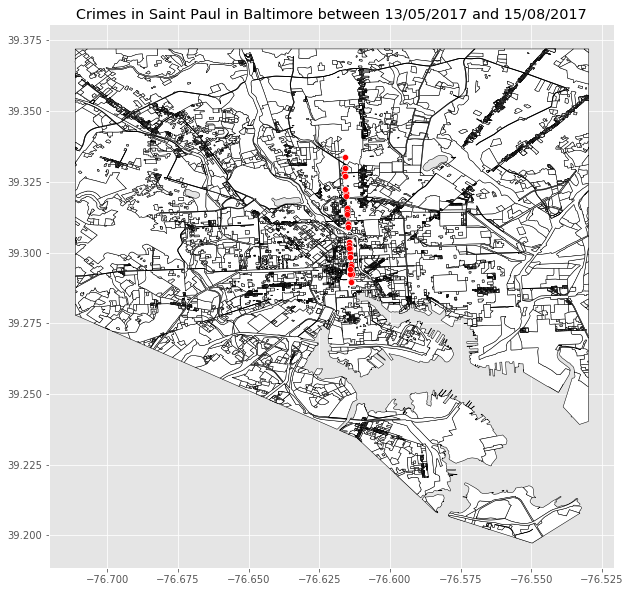

In [41]:
title_of_plot = 'Crimes in ' + location.title() + ' in Baltimore between ' + str(date_start.date().strftime("%d/%m/%Y")) + ' and ' + str(date_end.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

More information about Pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html

# Create a new function to plot the shapefile with the points of crimes by groups (categories)

In [42]:
def plot_shapefile_and_points_by_category_gp(shape_file_gp, df_crimes, title_of_plot, 
                                             column_category, colors_dict, markers_dict, 
                                             with_undefined_values=False, xlim=[], ylim=[]):
    
    # get the groups (categories)
    groups = df_crimes.groupby(column_category)

    # use the plot with the shapefile in background
    ax = shape_file_gp.plot(markersize=6, color="white", edgecolor="gray", figsize=(15,10))

    
    # settings of the plot
    ax.set_title(title_of_plot)
        
    if xlim:  # if there are values in list...
        ax.set_xlim(xlim)
    if ylim:  # if there are values in list...
        ax.set_ylim(ylim)
    

    # plot by groups
    for name, group in groups:
        # if I don't want the UNDEFINED category, so continue the for...
        if name == "UNDEFINED" and not with_undefined_values:
            continue

    #     marker = marker_dict[name]
        color = colors_dict[name]

        ax.plot(group.Longitude, # x
                group.Latitude,  # y
                marker='o', 
                linestyle='',  # without lines between the points
                label=name, c=color)

    ax.legend()

For more information: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

# Colors and markers for categories

Specifying the colors and markers for the categories:

In [43]:
# markers and color for columns that are categories
WeaponFactor = {
                "category_column": "WeaponFactor",
                "markers_dict": {'FIREARM':'o','HANDS':'^','KNIFE':'s', 'OTHER':'x', 'UNDEFINED':'o'},
                "colors_dict": {'FIREARM':'red', 'HANDS':'green', 'KNIFE':'blue', 'OTHER':'yellow', 'UNDEFINED':'purple'},
                }

# Example 4: One year of crimes on a neighborhood

Get all crimes on the following query:

In [44]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 12, 31)
neighborhood = "Abell"

df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime >= start_date) &
                                 (df_crimes_cp.CrimeDateTime <= end_date) &
                                 (df_crimes_cp.NeighborhoodFactor == neighborhood)
                                ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 30380 to 77947
Data columns (total 20 columns):
CrimeDateTime          125 non-null datetime64[ns]
CrimeDate              125 non-null object
CrimeTime              125 non-null object
CrimeCode              125 non-null object
Location               125 non-null object
Description            125 non-null object
Inside/Outside         123 non-null object
Weapon                 125 non-null object
Post                   125 non-null float64
District               125 non-null object
Neighborhood           125 non-null object
Longitude              125 non-null float64
Latitude               125 non-null float64
Lat_Long               125 non-null object
Premise                125 non-null object
DescriptionFactor      125 non-null category
WeaponFactor           125 non-null category
NeighborhoodFactor     125 non-null category
InsideOutsideFactor    123 non-null category
DistrictFactor         125 non-null category
dtypes: 

In [45]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
30380,2016-12-26,12/26/2016,00:00:00,6E,400 E 29TH ST,LARCENY,O,UNDEFINED,513.0,NORTHERN,Abell,-76.61088,39.32347,"(39.3234700000, -76.6108800000)",STREET,LARCENY,UNDEFINED,Abell,O,NORTHERN
31316,2016-12-19,12/19/2016,11:33:00,6J,3200 BARCLAY ST,LARCENY,O,UNDEFINED,513.0,NORTHERN,Abell,-76.61110,39.32728,"(39.3272800000, -76.6111000000)",STREET,LARCENY,UNDEFINED,Abell,O,NORTHERN
31366,2016-12-19,12/19/2016,02:30:00,6D,400 E 33RD ST,LARCENY FROM AUTO,O,UNDEFINED,513.0,NORTHERN,Abell,-76.61095,39.32822,"(39.3282200000, -76.6109500000)",STREET,LARCENY FROM AUTO,UNDEFINED,Abell,O,NORTHERN
31640,2016-12-16,12/16/2016,16:20:00,4C,3000 GREENMOUNT AVE,AGG. ASSAULT,O,OTHER,513.0,NORTHERN,Abell,-76.60945,39.32487,"(39.3248700000, -76.6094500000)",STREET,AGG. ASSAULT,OTHER,Abell,O,NORTHERN
32150,2016-12-12,12/12/2016,18:30:00,5B,3000 ABELL AVE,BURGLARY,I,UNDEFINED,513.0,NORTHERN,Abell,-76.61192,39.32495,"(39.3249500000, -76.6119200000)",ROW/TOWNHO,BURGLARY,UNDEFINED,Abell,I,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes, with the undefined (NaN) values:

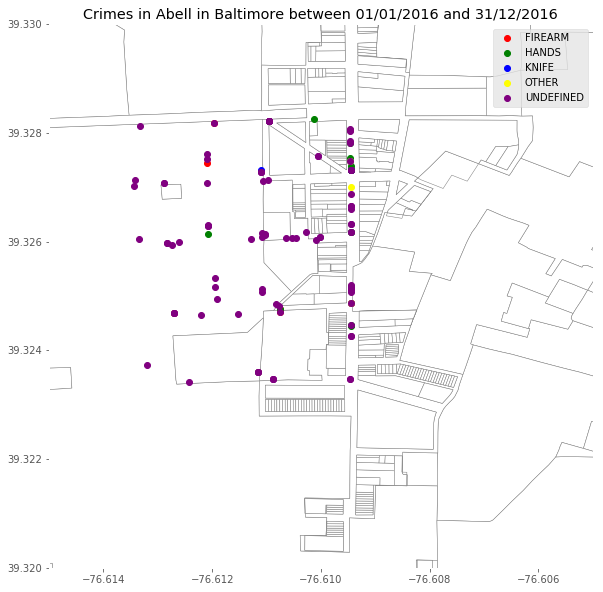

In [46]:
title_of_plot = 'Crimes in ' + neighborhood.title() + ' in Baltimore between ' + str(start_date.date().strftime("%d/%m/%Y")) + ' and ' + str(end_date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=True,
                                         xlim=[-76.615, -76.605], ylim=[39.32, 39.33])


Plot the shapefile with the point of crimes, without the undefined (NaN) values:

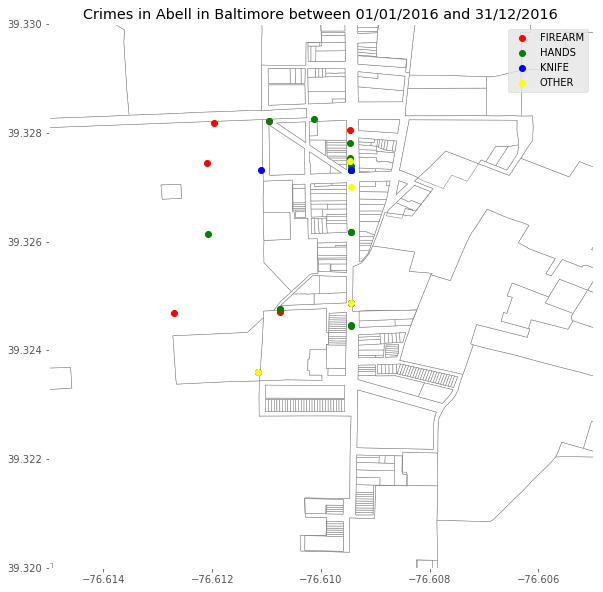

In [47]:
plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=False,
                                         xlim=[-76.615, -76.605], ylim=[39.32, 39.33])


# Example 5: One year of data on all Baltimore

Get all crimes on the following query:

In [48]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 12, 31)

df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime >= start_date) &
                                 (df_crimes_cp.CrimeDateTime <= end_date)
                                ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48691 entries, 29611 to 78301
Data columns (total 20 columns):
CrimeDateTime          48691 non-null datetime64[ns]
CrimeDate              48691 non-null object
CrimeTime              48691 non-null object
CrimeCode              48691 non-null object
Location               48495 non-null object
Description            48691 non-null object
Inside/Outside         48141 non-null object
Weapon                 48691 non-null object
Post                   48677 non-null float64
District               48678 non-null object
Neighborhood           48691 non-null object
Longitude              48497 non-null float64
Latitude               48497 non-null float64
Lat_Long               48497 non-null object
Premise                48691 non-null object
DescriptionFactor      48691 non-null category
WeaponFactor           48691 non-null category
NeighborhoodFactor     48691 non-null category
InsideOutsideFactor    48141 non-null category
DistrictFacto

In [49]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,InsideOutsideFactor,DistrictFactor
29611,2016-12-31,12/31/2016,23:51:00,4C,1600 E 25TH ST,AGG. ASSAULT,O,OTHER,342.0,EASTERN,Darley Park,-76.59388,39.31619,"(39.3161900000, -76.5938800000)",STREET,AGG. ASSAULT,OTHER,Darley Park,O,EASTERN
29612,2016-12-31,12/31/2016,23:30:00,6G,2000 ORLEANS ST,LARCENY,I,UNDEFINED,321.0,EASTERN,CARE,-76.58879,39.29539,"(39.2953900000, -76.5887900000)",RELIGIOUS,LARCENY,UNDEFINED,CARE,I,EASTERN
29613,2016-12-31,12/31/2016,23:30:00,4E,5100 PARK HEIGHTS AVE,COMMON ASSAULT,I,HANDS,614.0,NORTHWESTERN,Central Park Heights,-76.67510,39.34853,"(39.3485300000, -76.6751000000)",RESTAURANT,COMMON ASSAULT,HANDS,Central Park Heights,I,NORTHWESTERN
29614,2016-12-31,12/31/2016,23:30:00,6D,2700 ODONNELL ST,LARCENY FROM AUTO,NaN,UNDEFINED,232.0,SOUTHEASTERN,Canton,-76.57819,39.28026,"(39.2802600000, -76.5781900000)",UNDEFINED,LARCENY FROM AUTO,UNDEFINED,Canton,NaN,SOUTHEASTERN
29615,2016-12-31,12/31/2016,23:28:00,4C,4800 MIDWOOD AVE,AGG. ASSAULT,O,OTHER,524.0,NORTHERN,Kenilworth Park,-76.60395,39.34688,"(39.3468800000, -76.6039500000)",STREET,AGG. ASSAULT,OTHER,Kenilworth Park,O,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes, with the undefined (NaN) values:

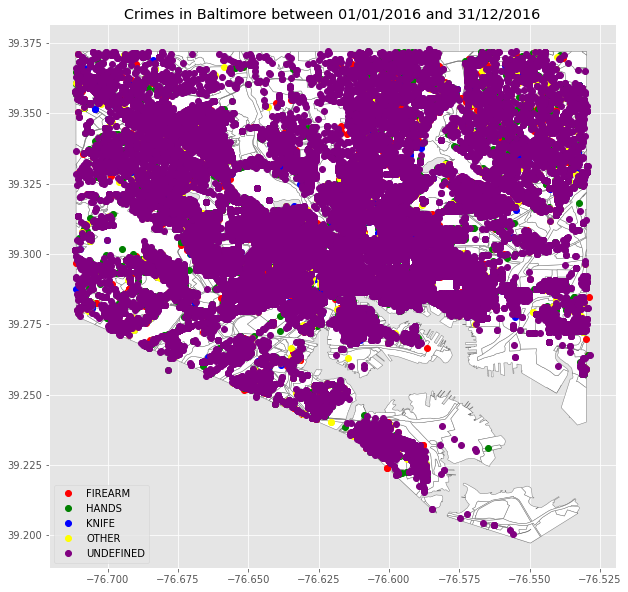

In [50]:
title_of_plot = 'Crimes in Baltimore between ' + str(start_date.date().strftime("%d/%m/%Y")) + ' and ' + str(end_date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=True)


Plot the shapefile with the point of crimes, without the undefined (NaN) values:

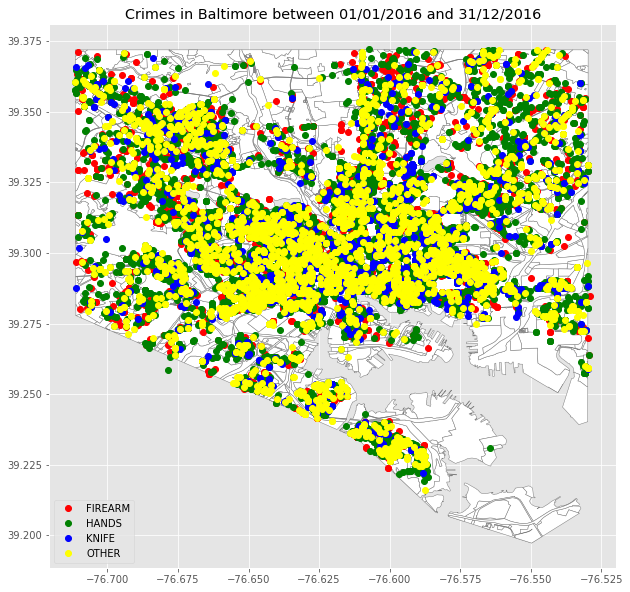

In [51]:
plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=False)


It's confuse... Let me another alternative like a time series and pie chart.

# Create a new function to plot a pie chart with the percent of points of crimes by groups (categories)

In [52]:
def pie_chart_of_categories(group_sum, figsize=(6,6), fontsize=12, title=""):
    fig = plt.figure(
                    figsize=figsize, 
                    dpi=100  # resolution
                    )

    ax = plt.subplot(111)

    group_sum.plot(kind='pie', 
                   ax=ax, 
                   autopct='%1.1f%%',  # text in the centroid
                   startangle=90, 
                   fontsize=fontsize)

    ax.set_ylabel('') # by default show "None", so I cleaned it
    
    ax.set_title(title)

# Create a new function to plot a interactive time series with bokeh

Auxiliar function to get the pallete of colors:

In [53]:
def get_pallete(categories_number):
    colors_pallete = {"Paired": 12, "Set1": 9, "Accent": 8, "Dark2": 8, "Set2": 8, "Set3": 12, "Spectral": 11}    
    
    # this part extend a pallete to more than max
    pallete_list = []
    count_max_colors = 0
    
    for pallete in colors_pallete:        
        max_colors_in_pallete = colors_pallete[pallete]        
        
        if categories_number > count_max_colors:
            # add in list the max of color of each pallete
            pallete_list.append(brewer[pallete][max_colors_in_pallete])
            
            count_max_colors += max_colors_in_pallete
        else:
            break  
    
    # join in a just one pallete list
    pallete = [item for sublist in pallete_list for item in sublist]    
    
    return pallete

Function to plot a interactive time series:

In [54]:
def plot_interactive_time_series(categories_data, categories_name,
                                    title = '',
                                    output_file_name = "index.html",
                                    width=1200,
                                    height=600,
                                    colors_pallete_name = "Dark2"):
        
    categories_number = len(categories_name)
    
    # get the pallete of colors
    pallete = get_pallete(categories_number)
    
    # settings    
    p = figure(plot_width=1200, plot_height=600, x_axis_type="datetime")
    p.title.text = title_of_plot

    for data, name, color in zip(categories_data, 
                                 categories_name, 
                                 pallete):

        date = data.index.date
        values = data.values

        p.line(date, values, line_width=2, color=color, legend=name)
        
    # settings
    p.legend.location = "top_left"
    p.legend.click_policy="hide"

    output_file(output_file_name, title=title)

    show(p)

## Time series

Get the amount of crimes (rows) by a date (CrimeDateTime):

In [55]:
crimes_by_date = df_crimes_query.groupby('CrimeDateTime').size()

crimes_by_date.tail()

CrimeDateTime
2016-12-27    136
2016-12-28    156
2016-12-29    127
2016-12-30    112
2016-12-31    125
dtype: int64

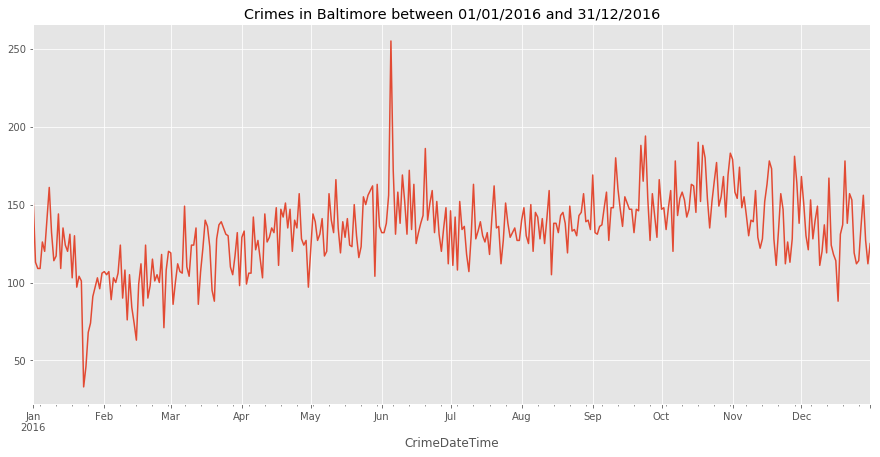

In [56]:
crimes_by_date.plot(figsize=(15,7),
                   title=title_of_plot)

With it we know that final of January there were little crimes, while begin of June there were a lot, on the year 2016.

## Time series by categories (factors)

### Time series by types of weapons

Now I want a time serie of crimes separating by the types of weapons:

In [57]:
crimes_by_weapons = pd.crosstab(df_crimes_query.CrimeDateTime, df_crimes_query.WeaponFactor)

crimes_by_weapons.head()

WeaponFactor,FIREARM,HANDS,KNIFE,OTHER,UNDEFINED
CrimeDateTime,,,,,
2016-01-01,11,26,3,11,102
2016-01-02,10,21,8,6,68
2016-01-03,12,13,6,5,73
2016-01-04,11,10,1,3,84
2016-01-05,10,20,6,8,82


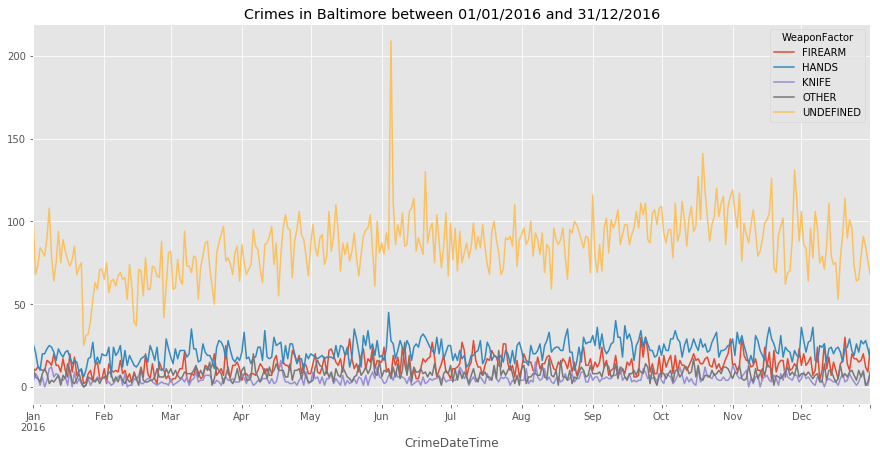

In [58]:
crimes_by_weapons.plot(figsize=(15,7), 
                       title=title_of_plot)

There are a lot of crimes that I don't know the type of weapon used (undefined values (NaN)). Hands are the most commonly used weapon. For more information of time series: https://stackoverflow.com/questions/46010122/transform-a-series-in-a-dataframe-of-pandas-python-where-the-columns-are-the-l

### Interactive time series by types of weapons

Now I want a interactive time series of crimes:

In [59]:
# list of categories names
categories_name = list(crimes_by_weapons.columns.values)
# the data for each category
categories_data = [crimes_by_weapons[category_name] for category_name in categories_name]

plot_interactive_time_series(categories_data, categories_name, title=title_of_plot)

A browser will open with the interactive time series.

## Pie Chart

Do a group by CrimeDateTime of the category of WeaponFactor and a sum of the WeaponFactor column (level 1):

In [60]:
group = df_crimes_query.groupby(["CrimeDateTime", "WeaponFactor"]).size()

group_sum = group.groupby(level=1).sum()

group_sum

WeaponFactor
FIREARM       4794
HANDS         8029
KNIFE         1749
OTHER         2838
UNDEFINED    31281
dtype: int64

Plot a pie chart of the WeaponFactor cateogories:

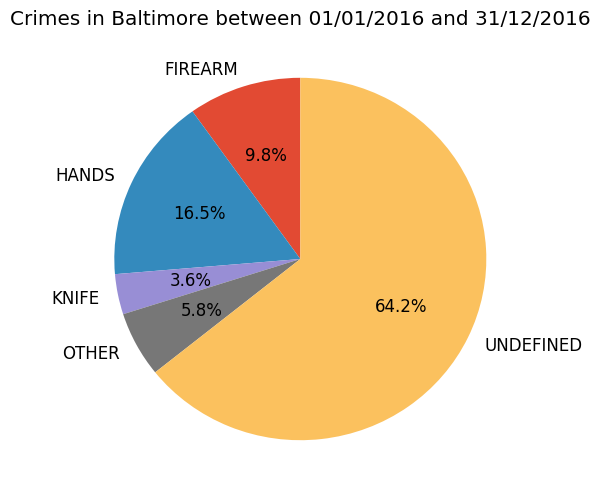

In [61]:
pie_chart_of_categories(group_sum, title=title_of_plot)

Really... the undefined category (NaN values) is greater than others. Probably, because the person that has made the collect, didn't fill this field.

### Time series by description

Now I want a time serie of crimes separating by the description:

In [62]:
crimes_by_descriptions = pd.crosstab(df_crimes_query.CrimeDateTime, df_crimes_query.DescriptionFactor)

crimes_by_descriptions.head()

DescriptionFactor,AGG. ASSAULT,ARSON,ASSAULT BY THREAT,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
CrimeDateTime,,,,,,,,,,,,,,,
2016-01-01,18,2,0,19,18,22,1,35,22,0,0,3,2,8,3
2016-01-02,14,0,4,10,6,20,0,33,8,0,0,7,1,9,1
2016-01-03,13,0,0,13,22,10,0,15,22,0,2,2,1,9,0
2016-01-04,5,0,0,21,24,10,0,21,14,0,2,3,3,6,0
2016-01-05,12,1,3,20,16,20,1,28,9,1,0,2,1,12,0


It is a interesting dataframe, without undefined (NaN) values. Let me plot it:

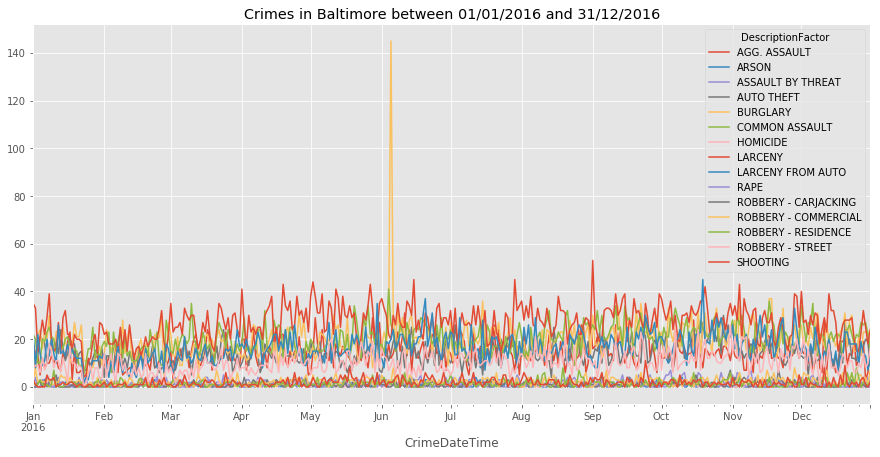

In [63]:
crimes_by_descriptions.plot(figsize=(15,7), 
                           title=title_of_plot)

In June the number of Burglary is big, more than 140 cases.

### Interactive time series by types of description

Now I want a interactive time series of crimes:

In [64]:
# list of categories names
categories_name = list(crimes_by_descriptions.columns.values)
# the data for each category
categories_data = [crimes_by_descriptions[category_name] for category_name in categories_name]

plot_interactive_time_series(categories_data, categories_name, title=title_of_plot)

A browser will open with the interactive time series.

## Pie Chart

Do a group by CrimeDateTime of the category of DescriptionFactor and a sum of the DescriptionFactor column (level 1):

In [65]:
group = df_crimes_query.groupby(["CrimeDateTime", "DescriptionFactor"]).size()

group_sum = group.groupby(level=1).sum()

group_sum

DescriptionFactor
AGG. ASSAULT            5098
ARSON                    261
ASSAULT BY THREAT        636
AUTO THEFT              5213
BURGLARY                7351
COMMON ASSAULT          7455
HOMICIDE                 318
LARCENY                 9823
LARCENY FROM AUTO       6015
RAPE                     286
ROBBERY - CARJACKING     411
ROBBERY - COMMERCIAL     857
ROBBERY - RESIDENCE      521
ROBBERY - STREET        3778
SHOOTING                 668
dtype: int64

Plot a pie chart of the DescriptionFactor cateogories:

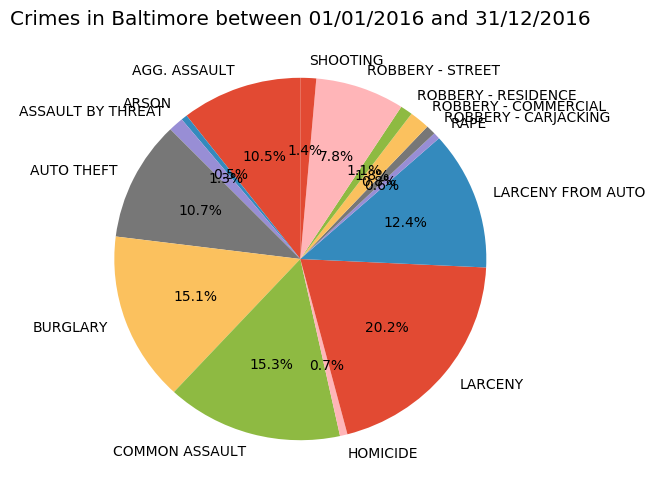

In [66]:
pie_chart_of_categories(group_sum, figsize=(6,6), fontsize=10, title=title_of_plot)

There is no undefined category (NaN values). 
Larceny was greater than other types of crime. 
But in June the number of Burglary was greater than others, more than 140 cases (according with the time series)

### Time series by district

Now I want a time serie of crimes separating by the district:

In [67]:
crimes_by_district = pd.crosstab(df_crimes_query.CrimeDateTime, df_crimes_query.DistrictFactor)

crimes_by_district.head()

DistrictFactor,CENTRAL,EASTERN,NORTHEASTERN,NORTHERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHWESTERN,WESTERN
CrimeDateTime,,,,,,,,,
2016-01-01,15,5,29,22,10,18,20,15,19
2016-01-02,13,9,11,14,11,20,10,16,9
2016-01-03,10,8,22,9,12,11,22,9,6
2016-01-04,14,10,14,7,18,17,12,8,9
2016-01-05,10,12,19,10,13,15,16,22,9


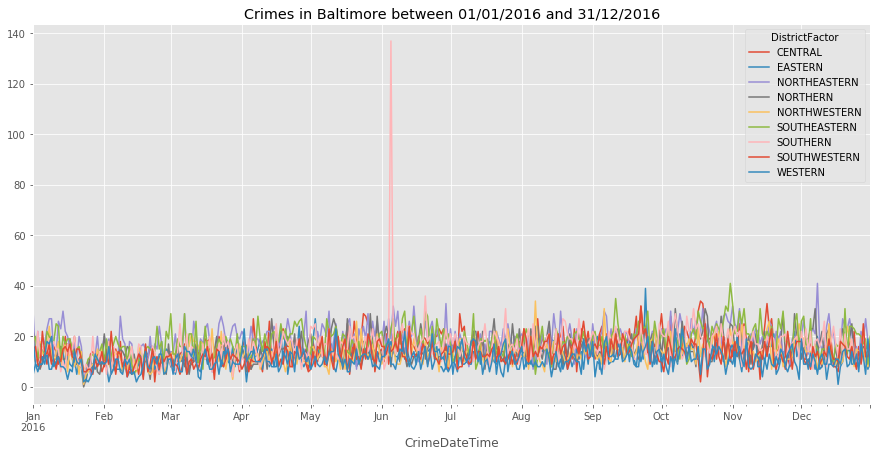

In [68]:
crimes_by_district.plot(figsize=(15,7),
                        title=title_of_plot)

Now we know that more than 140 cases of Burglary occurred in the Central district of Baltimore in June.

### Interactive time series by types of district

Now I want a interactive time series of crimes:

In [69]:
# list of categories names
categories_name = list(crimes_by_district.columns.values)
# the data for each category
categories_data = [crimes_by_district[category_name] for category_name in categories_name]

plot_interactive_time_series(categories_data, categories_name, title=title_of_plot)

A browser will open with the interactive time series.

## Pie Chart

Do a group by CrimeDateTime of the category of DescriptionFactor and a sum of the DescriptionFactor column (level 1):

In [70]:
group = df_crimes_query.groupby(["CrimeDateTime", "DistrictFactor"]).size()

group_sum = group.groupby(level=1).sum()

group_sum

DistrictFactor
CENTRAL         5694
EASTERN         4268
NORTHEASTERN    6875
NORTHERN        5409
NORTHWESTERN    4930
SOUTHEASTERN    6678
SOUTHERN        5989
SOUTHWESTERN    4764
WESTERN         4071
dtype: int64

Plot a pie chart of the DescriptionFactor cateogories:

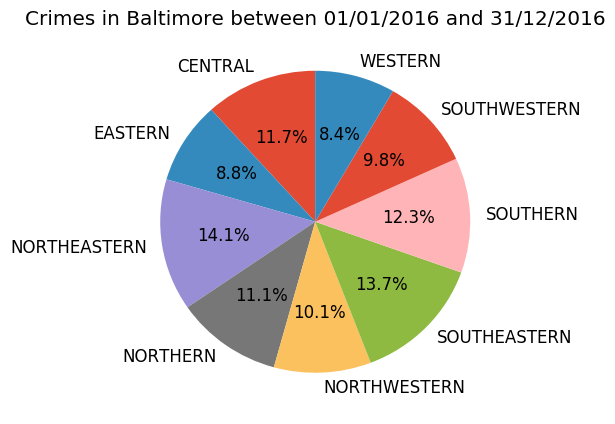

In [71]:
pie_chart_of_categories(group_sum, figsize=(5,5), title=title_of_plot)

## Conclusion

Most crimes: +140 cases, Weapon undefined, Burglary, Sourthern region 

# Obrigado